## Seed analysis
Look at the variability in the results of different seeds on the training of the models, and look which seeds perform well across models

In [1]:
import pandas as pd
import ast

In [2]:
models = ['count_naive_bayes_210221', 'count_log_reg_210221', 'count_SVM_210221',
         'tfidf_naive_bayes_210221', 'tfidf_log_reg_210221','tfidf_SVM_210221',
         'bert_naive_bayes_bert_210221', 'bert_log_reg_bert_210221', 'bert_SVM_bert_210221',
         'bert_naive_bayes_scibert_210221','bert_log_reg_scibert_210221', 'bert_SVM_scibert_210221']

In [3]:
model_scores = []
for model in models:
    with open(f'../model_repeats/{model}/repeated_results.txt', 'r') as f:
        for i, line in enumerate(f):
            model_run = ast.literal_eval(line)
            model_run['Model'] = model
            for metric, value in model_run['Train scores'].items():
                model_run[f'Train {metric}'] = value
            for metric, value in model_run['Test scores'].items():
                model_run[f'Test {metric}'] = value
            model_scores.append(model_run)

model_scores_df = pd.DataFrame(model_scores)

In [4]:
# All info for results
d=model_scores_df.groupby('Model')[['Test accuracy','Test f1','Test precision_score','Test recall_score']
                                ].agg({
    'Test accuracy':['mean', 'std', 'min','max'],
    'Test f1':['mean', 'std', 'min','max'],
    'Test precision_score':['mean', 'std', 'min','max'],
    'Test recall_score':['mean', 'std', 'min','max']}).round(3)
d

Test accuracy                      Test f1  \
                                         mean    std    min    max    mean   
Model                                                                        
bert_SVM_bert_210221                    0.769  0.011  0.759  0.796   0.775   
bert_SVM_scibert_210221                 0.765  0.017  0.735  0.800   0.769   
bert_log_reg_bert_210221                0.756  0.022  0.718  0.788   0.762   
bert_log_reg_scibert_210221             0.775  0.023  0.739  0.808   0.779   
bert_naive_bayes_bert_210221            0.736  0.015  0.710  0.755   0.738   
bert_naive_bayes_scibert_210221         0.762  0.020  0.739  0.800   0.771   
count_SVM_210221                        0.707  0.031  0.665  0.759   0.696   
count_log_reg_210221                    0.747  0.029  0.706  0.796   0.751   
count_naive_bayes_210221                0.762  0.020  0.731  0.800   0.787   
tfidf_SVM_210221                        0.744  0.033  0.694  0.784   0.736   
tfidf_log_reg_210221                    0.750  0.029  0.698  0.784   0.751   
tfidf_naive_bayes_210221                0.716  0.060  0.588  0.788   0.766   

                                                     Test precision_score  \
                                   std    min    max                 mean   
Model                                                                       
bert_SVM_bert_210221             0.016  0.755  0.800                0.785   
bert_SVM_scibert_210221          0.019  0.743  0.797                0.791   
bert_log_reg_bert_210221         0.016  0.737  0.789                0.777   
bert_log_reg_scibert_210221      0.021  0.739  0.807                0.796   
bert_naive_bayes_bert_210221     0.018  0.703  0.766                0.764   
bert_naive_bayes_scibert_210221  0.019  0.745  0.802                0.774   
count_SVM_210221                 0.029  0.661  0.749                0.759   
count_log_reg_210221             0.025  0.710  0.781                0.774   
count_naive_bayes_210221         0.020  0.766  0.816                0.735   
tfidf_SVM_210221                 0.038  0.678  0.789                0.802   
tfidf_log_reg_210221             0.032  0.692  0.789                0.784   
tfidf_naive_bayes_210221         0.037  0.689  0.817                0.685   

                                                     Test recall_score         \
                                   std    min    max              mean    std   
Model                                                                           
bert_SVM_bert_210221             0.034  0.722  0.828             0.768  0.028   
bert_SVM_scibert_210221          0.052  0.718  0.856             0.752  0.031   
bert_log_reg_bert_210221         0.026  0.736  0.817             0.748  0.028   
bert_log_reg_scibert_210221      0.029  0.750  0.839             0.765  0.039   
bert_naive_bayes_bert_210221     0.052  0.677  0.845             0.717  0.027   
bert_naive_bayes_scibert_210221  0.043  0.697  0.837             0.771  0.031   
count_SVM_210221                 0.033  0.705  0.827             0.646  0.055   
count_log_reg_210221             0.045  0.703  0.856             0.732  0.033   
count_naive_bayes_210221         0.031  0.691  0.782             0.849  0.030   
tfidf_SVM_210221                 0.046  0.728  0.871             0.689  0.093   
tfidf_log_reg_210221             0.047  0.716  0.876             0.730  0.085   
tfidf_naive_bayes_210221         0.091  0.533  0.803             0.887  0.068   

                                               
                                   min    max  
Model                                          
bert_SVM_bert_210221             0.718  0.811  
bert_SVM_scibert_210221          0.721  0.817  
bert_log_reg_bert_210221         0.696  0.792  
bert_log_reg_scibert_210221      0.707  0.817  
bert_naive_bayes_bert_210221     0.688  0.754  
bert_naive_bayes_scibert_210221  0.714  0.811  
count_SVM_210221                 0.581  0.765  
count_log

In [5]:
# For markdown table of results
import numpy as np
for i, row in d.iterrows():
    metric_results = '|'.join([f'{m[0]}/{m[1]}/({m[2]}, {m[3]})' for m in np.array_split(row.tolist(), 4)])
    print(f'|{i}|{metric_results}|')

|bert_SVM_bert_210221|0.769/0.011/(0.759, 0.796)|0.775/0.016/(0.755, 0.8)|0.785/0.034/(0.722, 0.828)|0.768/0.028/(0.718, 0.811)|
|bert_SVM_scibert_210221|0.765/0.017/(0.735, 0.8)|0.769/0.019/(0.743, 0.797)|0.791/0.052/(0.718, 0.856)|0.752/0.031/(0.721, 0.817)|
|bert_log_reg_bert_210221|0.756/0.022/(0.718, 0.788)|0.762/0.016/(0.737, 0.789)|0.777/0.026/(0.736, 0.817)|0.748/0.028/(0.696, 0.792)|
|bert_log_reg_scibert_210221|0.775/0.023/(0.739, 0.808)|0.779/0.021/(0.739, 0.807)|0.796/0.029/(0.75, 0.839)|0.765/0.039/(0.707, 0.817)|
|bert_naive_bayes_bert_210221|0.736/0.015/(0.71, 0.755)|0.738/0.018/(0.703, 0.766)|0.764/0.052/(0.677, 0.845)|0.717/0.027/(0.688, 0.754)|
|bert_naive_bayes_scibert_210221|0.762/0.02/(0.739, 0.8)|0.771/0.019/(0.745, 0.802)|0.774/0.043/(0.697, 0.837)|0.771/0.031/(0.714, 0.811)|
|count_SVM_210221|0.707/0.031/(0.665, 0.759)|0.696/0.029/(0.661, 0.749)|0.759/0.033/(0.705, 0.827)|0.646/0.055/(0.581, 0.765)|
|count_log_reg_210221|0.747/0.029/(0.706, 0.796)|0.751/0.025/(0

## Best seeds

In [6]:
# Best seed for highest Test F1 score
model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test f1"], ascending = False).round(3)

,Test accuracy,Test f1,Test precision_score,Test recall_score
Split random seed,,,,
1,0.763,0.774,0.813,0.743
8,0.765,0.762,0.783,0.751
9,0.756,0.762,0.738,0.794
4,0.759,0.760,0.756,0.770
2,0.741,0.760,0.815,0.717
6,0.747,0.756,0.734,0.786
7,0.747,0.755,0.704,0.822
3,0.737,0.752,0.813,0.705
5,0.738,0.748,0.783,0.720


In [7]:
# Best seed for highest Test precision score
model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test precision_score"], ascending = False).round(3)

,Test accuracy,Test f1,Test precision_score,Test recall_score
Split random seed,,,,
2,0.741,0.760,0.815,0.717
3,0.737,0.752,0.813,0.705
1,0.763,0.774,0.813,0.743
5,0.738,0.748,0.783,0.720
8,0.765,0.762,0.783,0.751
4,0.759,0.760,0.756,0.770
0,0.738,0.740,0.749,0.735
9,0.756,0.762,0.738,0.794
6,0.747,0.756,0.734,0.786


In [8]:
# Best seed for highest Test recall score
model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test recall_score"], ascending = False).round(3)

,Test accuracy,Test f1,Test precision_score,Test recall_score
Split random seed,,,,
7,0.747,0.755,0.704,0.822
9,0.756,0.762,0.738,0.794
6,0.747,0.756,0.734,0.786
4,0.759,0.760,0.756,0.770
8,0.765,0.762,0.783,0.751
1,0.763,0.774,0.813,0.743
0,0.738,0.740,0.749,0.735
5,0.738,0.748,0.783,0.720
2,0.741,0.760,0.815,0.717


In [21]:
## Best rankings for all models
average_per_seed = model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean()
print(average_per_seed.sort_values(["Test f1"], ascending = False).round(3).index)
print(average_per_seed.sort_values(["Test precision_score"], ascending = False).round(3).index)
print(average_per_seed.sort_values(["Test recall_score"], ascending = False).round(3).index)

Int64Index([1, 8, 9, 4, 2, 6, 7, 3, 5, 0], dtype='int64', name='Split random seed')
Int64Index([2, 3, 1, 5, 8, 4, 0, 9, 6, 7], dtype='int64', name='Split random seed')
Int64Index([7, 9, 6, 4, 8, 1, 0, 5, 2, 3], dtype='int64', name='Split random seed')


In [28]:
average_per_seed

,Test accuracy,Test f1,Test precision_score,Test recall_score
Split random seed,,,,
0,0.738095,0.739788,0.749497,0.734667
1,0.762925,0.774168,0.812529,0.743210
2,0.741497,0.759571,0.815133,0.716903
3,0.737415,0.752068,0.813130,0.705357
4,0.758844,0.760305,0.756035,0.770492
5,0.737755,0.747732,0.782702,0.719925
6,0.747279,0.756001,0.733785,0.786202
7,0.746939,0.754548,0.704021,0.822464
8,0.764966,0.762385,0.782600,0.751344


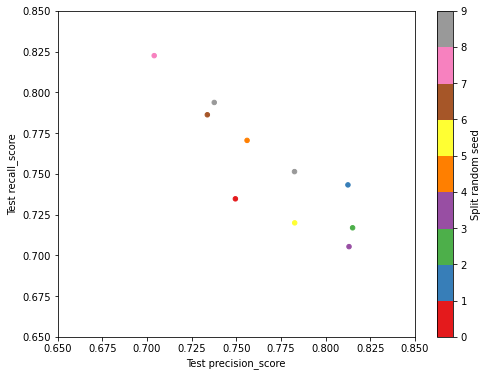

In [42]:
average_per_seed['Split random seed'] = average_per_seed.index
average_per_seed.plot.scatter(
    'Test precision_score',
    'Test recall_score',
    c='Split random seed',
    colormap='Set1',
    sharex=False,
    figsize=(8,6),
    xlim=(0.65,0.85),
    ylim=(0.65,0.85)
);

In [19]:
top_models = [model for model, value in dict(
    model_scores_df.groupby('Model')['Test f1'].mean()
).items() if value > 0.77]
print(len(top_models))
top_model_scores_df = model_scores_df.loc[model_scores_df['Model'].isin(top_models)]

4


In [20]:
## Best rankings for top models only
print(top_model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test f1"], ascending = False).round(3).index)
print(top_model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test precision_score"], ascending = False).round(3).index)
print(top_model_scores_df.groupby('Split random seed')[['Test accuracy','Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test recall_score"], ascending = False).round(3).index)

Int64Index([1, 4, 8, 3, 2, 9, 5, 6, 7, 0], dtype='int64', name='Split random seed')
Int64Index([3, 1, 2, 8, 5, 4, 0, 9, 6, 7], dtype='int64', name='Split random seed')
Int64Index([7, 9, 4, 6, 8, 1, 2, 3, 5, 0], dtype='int64', name='Split random seed')


## The model results with a particular seed

In [43]:
seed_number = 1

In [44]:
model_scores_df.loc[model_scores_df['Split random seed']==seed_number][['Model','Test f1','Test precision_score','Test recall_score']].sort_values(["Test f1"], ascending = False).round(3)

,Model,Test f1,Test precision_score,Test recall_score
31,tfidf_naive_bayes_210221,0.817,0.779,0.859
1,count_naive_bayes_210221,0.816,0.782,0.852
101,bert_log_reg_scibert_210221,0.794,0.819,0.770
71,bert_log_reg_bert_210221,0.789,0.817,0.763
111,bert_SVM_scibert_210221,0.783,0.839,0.733
81,bert_SVM_bert_210221,0.780,0.815,0.748
91,bert_naive_bayes_scibert_210221,0.779,0.803,0.756
11,count_log_reg_210221,0.772,0.806,0.741
41,tfidf_log_reg_210221,0.759,0.814,0.711
61,bert_naive_bayes_bert_210221,0.746,0.803,0.696


In [45]:
model_scores_df.groupby(['Model'])[['Test f1','Test precision_score','Test recall_score']].mean().sort_values(["Test f1"], ascending = False).round(3)

,Test f1,Test precision_score,Test recall_score
Model,,,
count_naive_bayes_210221,0.787,0.735,0.849
bert_log_reg_scibert_210221,0.779,0.796,0.765
bert_SVM_bert_210221,0.775,0.785,0.768
bert_naive_bayes_scibert_210221,0.771,0.774,0.771
bert_SVM_scibert_210221,0.769,0.791,0.752
tfidf_naive_bayes_210221,0.766,0.685,0.887
bert_log_reg_bert_210221,0.762,0.777,0.748
tfidf_log_reg_210221,0.751,0.784,0.730
count_log_reg_210221,0.751,0.774,0.732


In [46]:
model_scores_df[['Model','Split random seed', 'Test f1','Test precision_score','Test recall_score']].sort_values(["Test f1"], ascending = False).round(3).head(10)

,Model,Split random seed,Test f1,Test precision_score,Test recall_score
31,tfidf_naive_bayes_210221,1,0.817,0.779,0.859
1,count_naive_bayes_210221,1,0.816,0.782,0.852
8,count_naive_bayes_210221,8,0.815,0.766,0.871
2,count_naive_bayes_210221,2,0.807,0.761,0.858
109,bert_log_reg_scibert_210221,9,0.807,0.797,0.817
105,bert_log_reg_scibert_210221,5,0.806,0.832,0.782
94,bert_naive_bayes_scibert_210221,4,0.802,0.792,0.811
83,bert_SVM_bert_210221,3,0.800,0.815,0.786
84,bert_SVM_bert_210221,4,0.798,0.786,0.811
32,tfidf_naive_bayes_210221,2,0.797,0.800,0.794
